In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujay1844/used-car-Prices")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'used-car-prices' dataset.
Path to dataset files: /kaggle/input/used-car-prices


Using Colab cache for faster access to the 'used-car-prices' dataset.
Iteration 0, Cost: 0.6931
Iteration 100, Cost: 4.1752
Iteration 200, Cost: 4.1752
Iteration 300, Cost: 4.1752
Iteration 400, Cost: 23.4558
Iteration 500, Cost: 23.4558
Iteration 600, Cost: 23.4558
Iteration 700, Cost: 4.1752
Iteration 800, Cost: 4.1752
Iteration 900, Cost: 4.1752
Final parameters (w):
[-2.80394349e+00 -5.65308186e+03 -5.68417697e+01 -3.67047656e+03
 -2.12373480e+02 -6.18445946e+02 -7.61413751e-01]


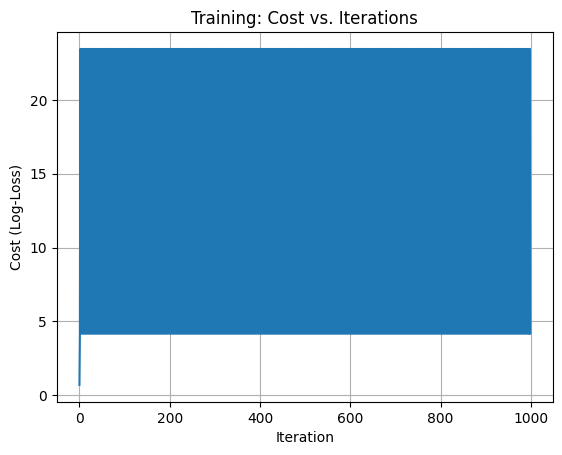

Plotting cost sensitivity for parameter indices: [1 3 5]


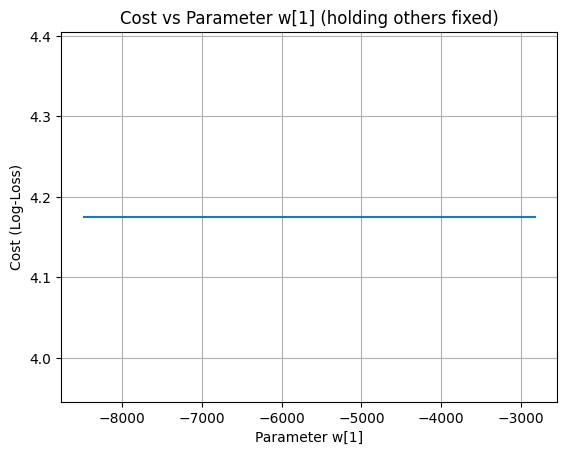

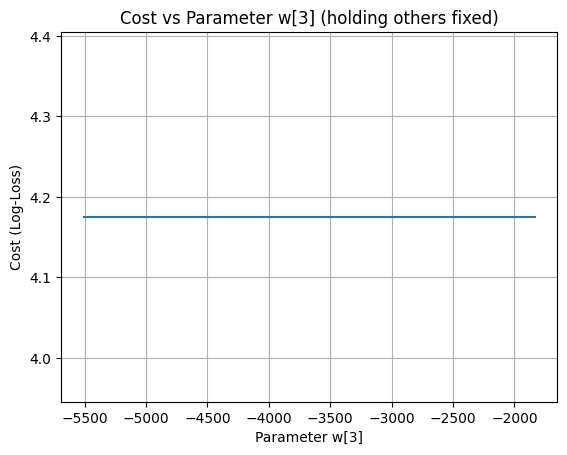

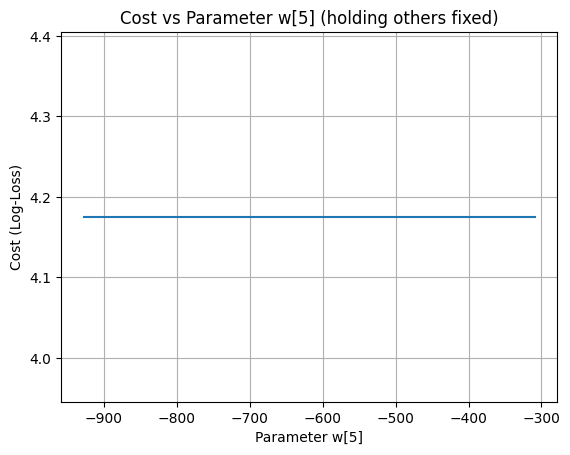

In [ ]:
# ================================
# Logistic Regression (from scratch) — Skeleton
# ================================

# 0) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression


# 1) Load / prepare data
# --------------------------------------------------
# Assumptions (edit as needed):
#   - Binary classification with labels in {0,1}
#   - X is an (m, n) feature matrix (no bias column yet)
#   - y is an (m,) label vector

# TODO: replace with your real data loading
def load_data(path=""):
    path = kagglehub.dataset_download("sujay1844/used-car-prices")
    df = pd.read_csv(path + "/train.csv")

    # Define luxury brands
    luxury_brands = ["BMW", "Mercedes-Benz", "Audi", "Lexus"]
    df["Luxury"] = df["Name"].str.split().str[0].isin(luxury_brands).astype(int)

    # --- Clean numeric columns ---
    def clean_price(x):
        if pd.isna(x):
            return np.nan
        s = str(x).replace(",", "").strip()
        # Handle Lakhs and Crores
        if "Lakh" in s:
            return float(s.replace("Lakh", "").strip()) * 100000
        elif "Cr" in s:
            return float(s.replace("Cr", "").strip()) * 10000000
        try:
            return float(s)
        except:
            return np.nan

    def clean_number(x):
        if pd.isna(x):
            return np.nan
        try:
            return float(str(x).split()[0])
        except:
            return np.nan

    # Apply cleaners
    df["New_Price"] = df["New_Price"].apply(clean_price)
    df["Price"] = df["Price"].apply(lambda v: float(v) * 100000 if pd.notna(v) else np.nan)  # already in lakhs
    df["Mileage"] = df["Mileage"].apply(clean_number)
    df["Engine"] = df["Engine"].apply(clean_number)
    df["Power"] = df["Power"].apply(clean_number)
    df["Year"] = df["Year"].astype(float)

    # Drop rows with missing values
    df = df.dropna(subset=["Year", "Mileage", "Engine", "Power", "New_Price", "Price"])

    # Feature: depreciation rate
    df["Depreciation_Rate"] = (df["New_Price"] - df["Price"]) / df["New_Price"]

    # Features for logistic regression
    features = ["Year", "Mileage", "Engine", "Power", "New_Price", "Depreciation_Rate"]
    X = df[features].values
    y = df["Luxury"].values

    return X, y


X, y = load_data()
m, n = X.shape

# Add bias column (x0 = 1)
X = np.column_stack([np.ones(m), X])  # shape: (m, n+1)
n_with_bias = X.shape[1]


# 2) Utility functions: sigmoid, loss, gradient, prediction
# --------------------------------------------------
def sigmoid(z):
    # σ(z) = 1 / (1 + e^-z)
    # TODO: Complete the sigmoid function
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w):
    # p = σ(Xw)
    # TODO: Complete the predict probability function
    z = X.dot(w)
    return sigmoid(z)

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    # Log-loss = - [ y log(p) + (1-y) log(1-p) ]
    # You might need to restrict the values using np.clip
    # TODO: Complete the binary cross entropy function

    y_prob = np.clip(y_prob, eps, 1-eps)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

def gradient(X, y_true, y_prob):
    # ∂J/∂w = (1/m) X^T (p - y)
    # TODO: Complete the gradient descent function

    m = len(y_true)
    return (1/m) * X.T.dot(y_prob - y_true)


# 3) Initialize parameters
# --------------------------------------------------
# TODO: set the initial values for the parameters

w = np.zeros(n_with_bias)

# 4) Hyperparameters
# --------------------------------------------------
# TODO: set learning_rate and num_iterations

learning_rate = 0.01
num_iterations = 1000

#For tracking
cost_history = []



# 5) Gradient Descent loop
# --------------------------------------------------

    # TODO: Forward pass: compute probabilities
    # TODO: Compute loss (log-loss / cross-entropy)
    # TODO: Backward pass: compute gradient
    # TODO Parameter update

for i in range(num_iterations):
  # Forward pass
  y_prob = predict_proba(X, w)

  # Compute loss
  cost = binary_cross_entropy(y, y_prob)
  cost_history.append(cost)

  # Backward pass
  grad = gradient(X, y, y_prob)

  w -= learning_rate * grad

  if i % 100 == 0:
    print(f"Iteration {i}, Cost: {cost:.4f}")


# 6) Final parameters
# --------------------------------------------------
print("Final parameters (w):")
print(w)  # w[0] is bias term


# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()


# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
# Idea: pick 3 parameters (excluding bias) by magnitude after training,
# then sweep each parameter around its learned value while holding others fixed,
# and plot the (1D) cost curve for each.
#At the end of training, you have a weight vector w (parameters). You also have a
# cost function 𝐽 ( 𝑤)
#J(w), which tells you how good or bad those weights are.

#Normally, we look at cost vs iterations (how the loss decreases over time). But sometimes it’s useful to see:
# “What happens to the cost if I wiggle just one parameter, while keeping all others fixed?”

# That’s what the sweep does.
#For each candidate value in the sweep, we create a temporary weight vector w_tmp.
# We replace the chosen parameter with val.
# Then we compute the cost 𝐽 (𝑤_tmp ) using the same dataset.
# Append that cost to a list.

#We plot:

#x-axis: the parameter’s value (from the sweep)

#y-axis: the cost computed at that parameter value

#This shows the “sensitivity curve” of the cost with respect to that parameter.

# Identify top-3 parameters by |w| (excluding bias at index 0)

param_indices = np.argsort(np.abs(w[1:]))[::-1][:3] + 1  # shift by 1 to skip bias
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
    # Helper to compute cost for a modified parameter vector
    y_hat_mod = predict_proba(X, mod_w)
    return binary_cross_entropy(y, y_hat_mod)

# For each chosen parameter, sweep values and compute cost
for idx in param_indices:
    center = w[idx]
    # Sweep around ±50% of parameter value (scale-aware)
    sweep = np.linspace(center * 0.5, center * 1.5, 60)

    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}]")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}] (holding others fixed)")
    plt.grid(True)
    plt.show()


# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    # Returns 0/1 predictions based on threshold
    return (predict_proba(X_new, w) >= threshold).astype(int)

# Example usage (remove in production):
# preds = predict_label(X, w)
# accuracy = (preds == y).mean()
# print("Training accuracy (for reference only):", accuracy)